Phase:  0.166667

Precison:  6



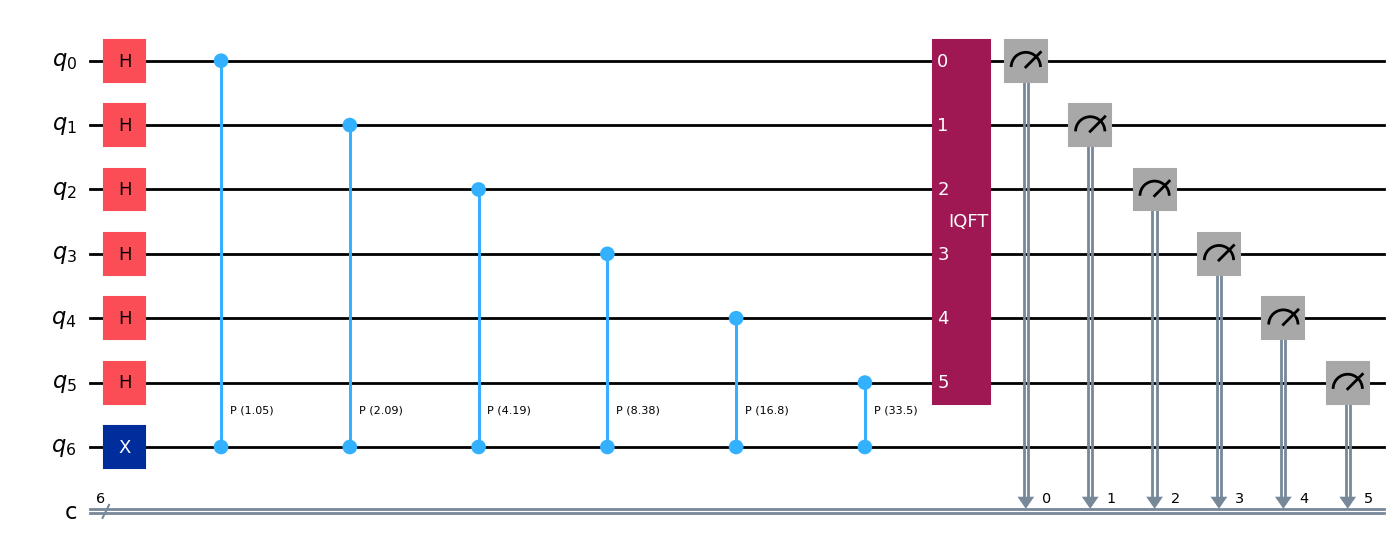

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFT
import numpy as np
pi = np.pi

phi = round(float(eval(input("Enter the phase to be estimated: "))), 6)
print("Phase: ", phi)
print()

n = int(input("Precision upto: "))
print("Precison: ", n)
print()


qc = QuantumCircuit(n+1, n)
# apply hadamard gates to every precision bit
precision_bits = classical_bits = range(0, n) # 0 to n-1
qc.h(precision_bits)
# the eigen state is ket 1 state
qc.x(n)

# there are two ways to apply the unitary gates.
# 1. U^2^T-1, U^2^T-2, ...., U^2^T-(k-2), U^2^T-(k-1), on each qubit without the swap gates(can be set in IQFT options)
# 2. U^2^T-(k-1), U^2^T-(k-2), ...., U^2^T-2, U^2^T-1, on each qubit with the swap gates(default in IQFT)
# where T is the total qubits needed for precision and k-1 is the qubits allocated in the circuit for estimating the phase.
# this follows the latter one.
for i in precision_bits:
    qc.cp((2 ** i)*(2*pi * phi), i, n)

iqft = QFT(n, do_swaps = True).inverse()

qc.append(iqft.to_gate(), precision_bits) # IQFT added to the the precison bits

qc.measure(precision_bits, classical_bits) # measuring the precision bits
qc.draw('mpl')

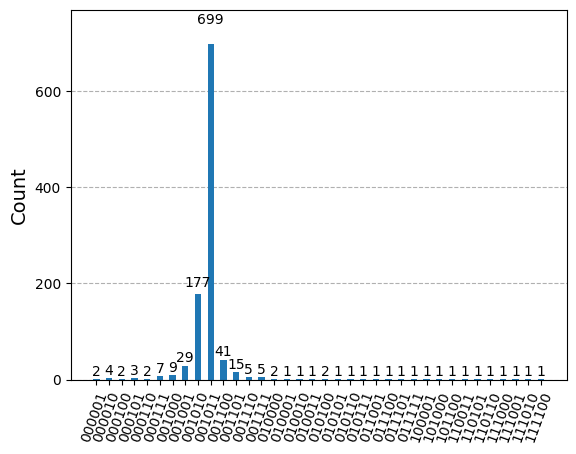

In [2]:
from qiskit_aer import Aer
from qiskit.visualization import  plot_histogram

sim = Aer.get_backend('aer_simulator')
trans = transpile(qc, sim)
results = sim.run(trans, shots = 1024).result()
counts = results.get_counts()
plot_histogram(counts)

In [12]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram, array_to_latex

import numpy as np

qc= QuantumCircuit(1)
# psi = np.array([1, 1]) / np.sqrt(2)
# qc.initialize(psi, 0)
qc.h(0)
qc.measure_all()
qc.save_statevector()
sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, sim)
result = sim.run(qc).result()

# qc.draw('mpl')
# counts = result.get_counts()
# plot_histogram(counts)

final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector} = ")

for i in range(0, n):
    print(i)



0
1
2
3
